In [53]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True



credit = pd.read_csv("credit_card.csv")
credit.head(10)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [54]:
print("Data null \n", credit.isnull().sum())
print("\n")
print("Data kosong \n", credit.empty)
print("\n")
print("Data NaN \n", credit.isnull().sum())

Data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


Data kosong 
 False


Data NaN 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [55]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


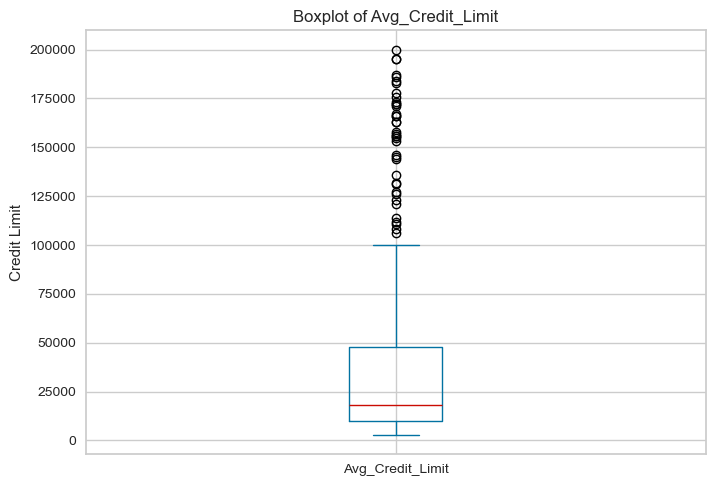

In [56]:
df_credit['Avg_Credit_Limit'].plot(kind='box')
plt.title('Boxplot of Avg_Credit_Limit')  # Optional: add a title
plt.ylabel('Credit Limit')  # Optional: label the y-axis
plt.show()  # Display the plot

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


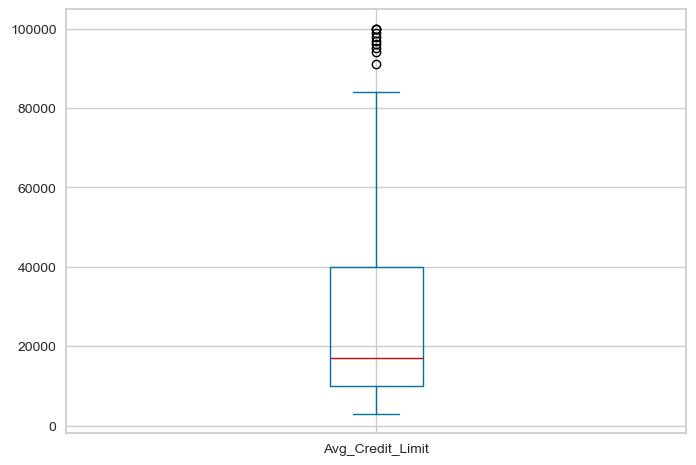

In [57]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    # Menggunakan quantile 75:25 untuk mendeteksi outlier
    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghilangkan outlier
    return data_frame[(data_frame[kolom_outlier] >= lower_bound) & (data_frame[kolom_outlier] <= upper_bound)]

# Menghapus outlier hanya pada kolom "Avg_Credit_Limit"
data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

# Menampilkan kembali sebaran nilai dari kolom "Avg_Credit_Limit" setelah dibersihkan
data_bersih['Avg_Credit_Limit'].plot(kind='box')
plt.show()


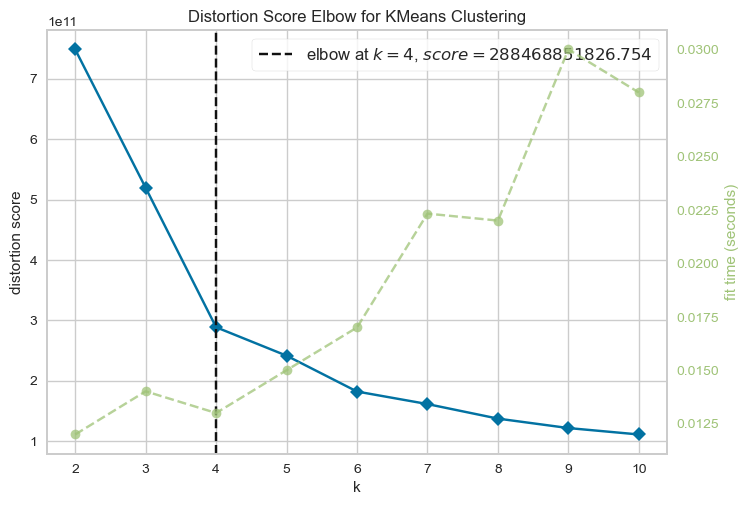

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

warnings.filterwarnings('ignore')

data = pd.read_csv('credit_card.csv')
data_cleaned = data.dropna()

kMeansC = KMeans(random_state=48)
vis = KElbowVisualizer(kMeansC, k=(2, 11))

vis.fit(data_cleaned)

vis.show()


silhouette score K-Means for  2  cluster : 0.7254150167909509
silhouette score K-Means for  3  cluster : 0.7058100919802311
silhouette score K-Means for  4  cluster : 0.5866654641248105
silhouette score K-Means for  5  cluster : 0.5986950720392292
silhouette score K-Means for  6  cluster : 0.6178729947858173
silhouette score K-Means for  7  cluster : 0.5950185929146289
silhouette score K-Means for  8  cluster : 0.6163567935085081
silhouette score K-Means for  9  cluster : 0.5949266725727135
silhouette score K-Means for  10  cluster : 0.5896785511400461


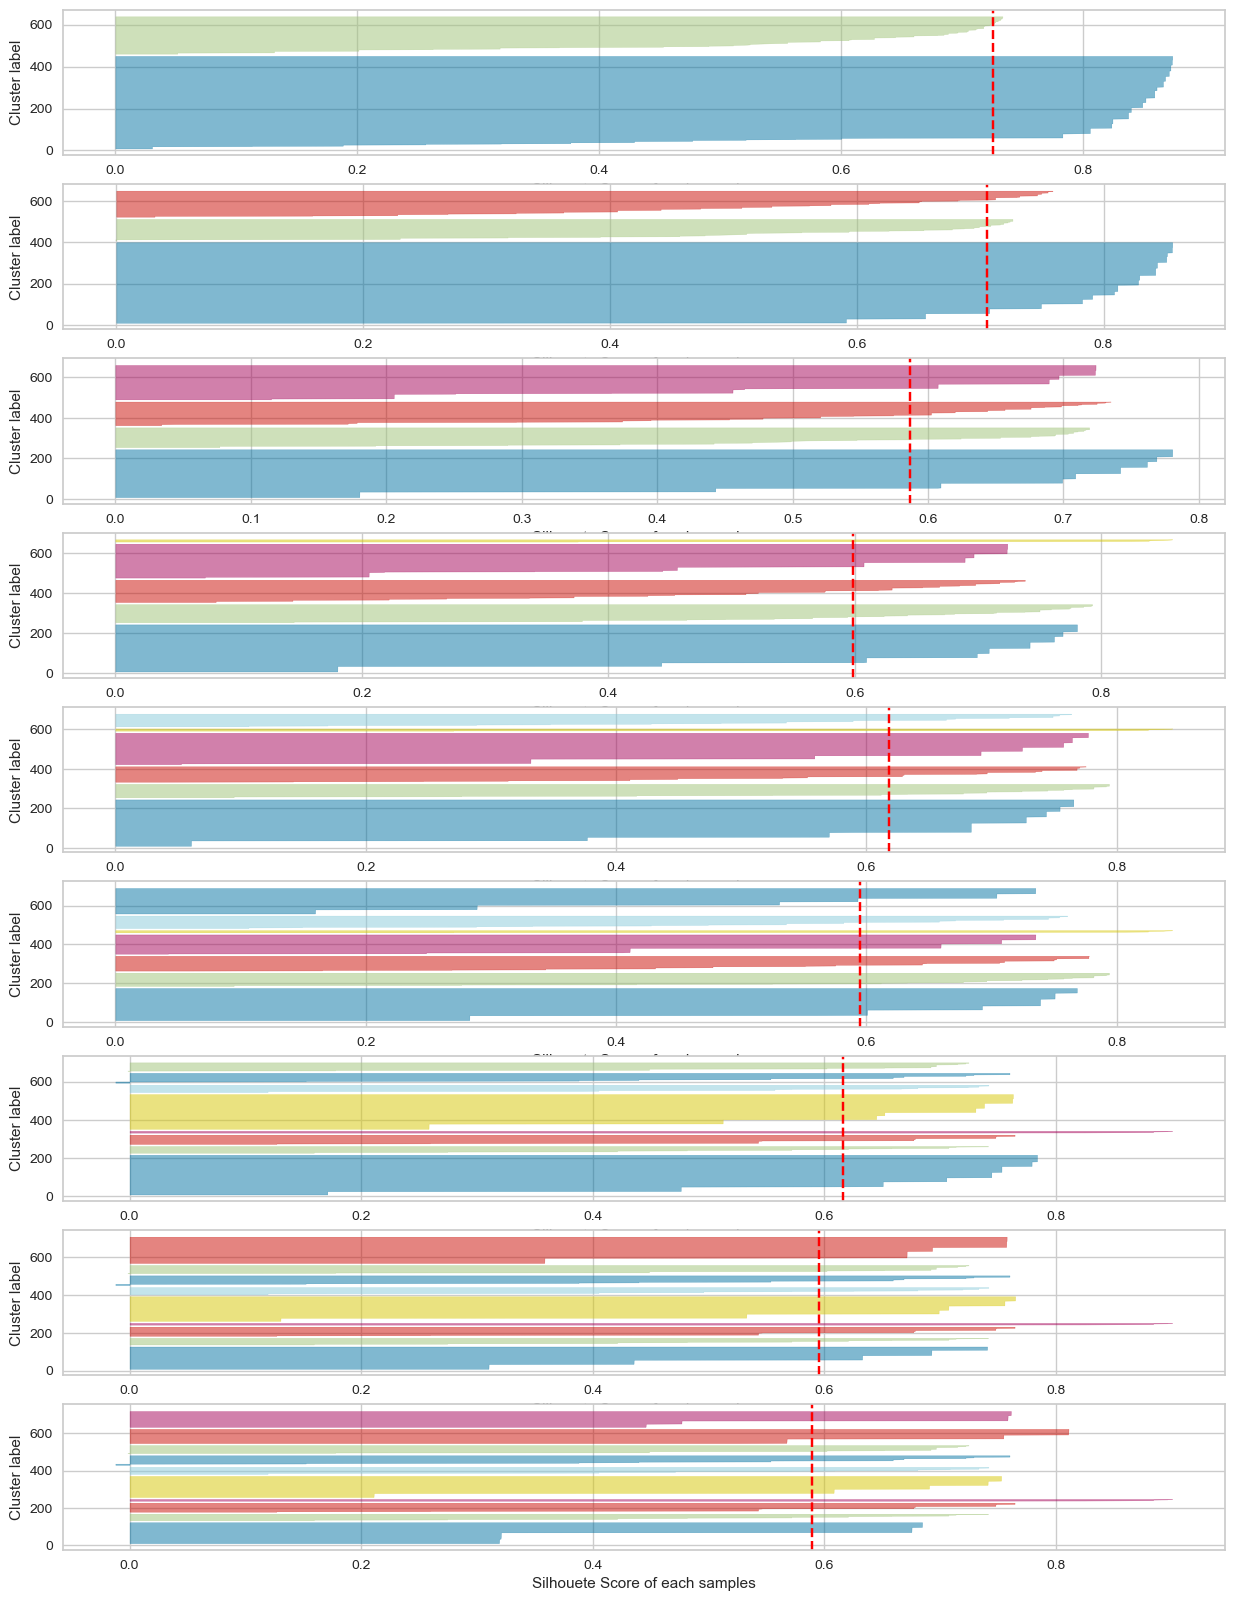

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=48)
    KM_clusters=KMeansC.fit_predict(data_bersih)
    print("silhouette score K-Means for ", k, " cluster :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel = "Silhouete Score of each samples", ylabel="Cluster label")

In [60]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

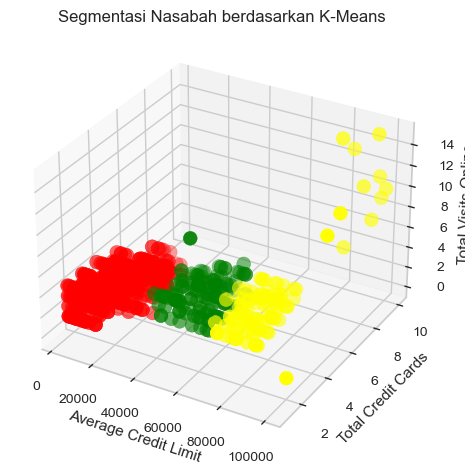

Silhouette Score K-Means: 0.706


In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create KMeans object with desired number of clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=48)
K_clusters = kmeans.fit_predict(data_bersih)  # Perform clustering on "data_bersih" data and store the result

# Create 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Define colors for each cluster
cluster_colors = {0: 'red', 1: 'yellow', 2: 'green'}

# Plot the 3D scatter plot using the defined colors
ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')  # X-axis label
ax.set_ylabel('Total Credit Cards')   # Y-axis label
ax.set_zlabel('Total Visits Online')  # Z-axis label
plt.show()  # Display the plot

# Calculate and display the Silhouette Score
print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))


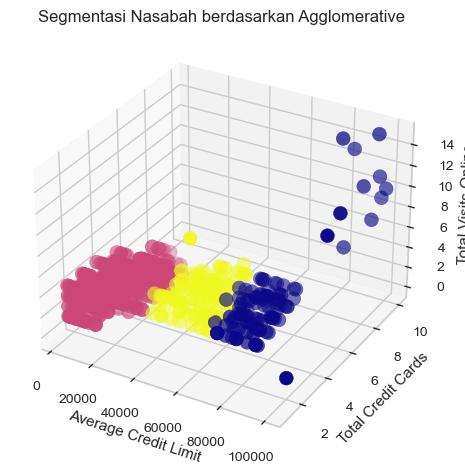

Silhouette Score Agglomerative: 0.705


In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = plt.axes(projection='3d')

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')
AGG_clusters = AGG.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score Agglomerative: %0.3f" % silhouette_score(data_bersih, AGG_clusters))


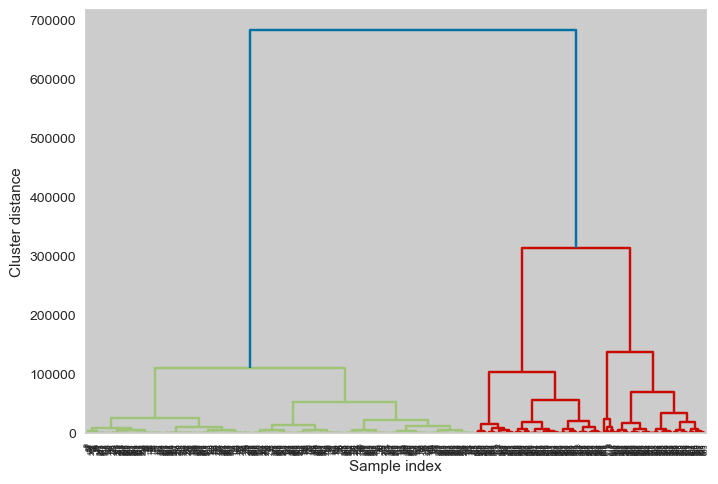

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linkage_array = linkage(data_bersih, method='ward')

dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# Menampilkan dendrogram
plt.show()


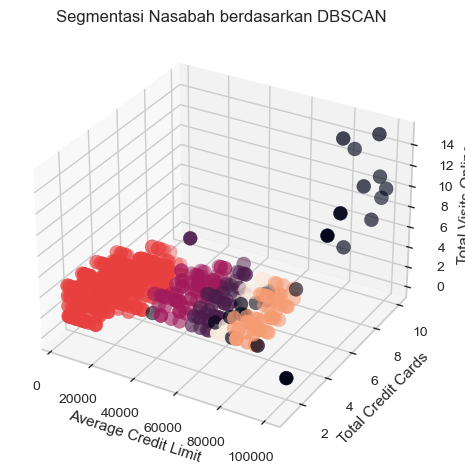

Silhouette Score DBSCAN: 0.657


In [64]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

DBSC = DBSCAN(min_samples=20, eps=2500)
DBSC_clusters = DBSC.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score DBSCAN: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))


In [65]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump(kmeans, r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump(AGG, r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump(DBSC, r)

print("Model berhasil disimpan")


Model berhasil disimpan
